In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [2]:
data = pd.read_csv('../../assets/dataset/train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [22]:
store1 = data[data.Store==1]
store1.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

In [23]:
store1[['Weekly_Sales']].resample('W').apply(['mean']).head()

,Weekly_Sales
,mean
Date,
2010-02-07,22516.313699
2010-02-14,22804.964444
2010-02-21,22081.755753
2010-02-28,19579.549861
2010-03-07,21298.721644


In [46]:
df1 = store1[['Weekly_Sales']].resample('W').sum()
df1.head()

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


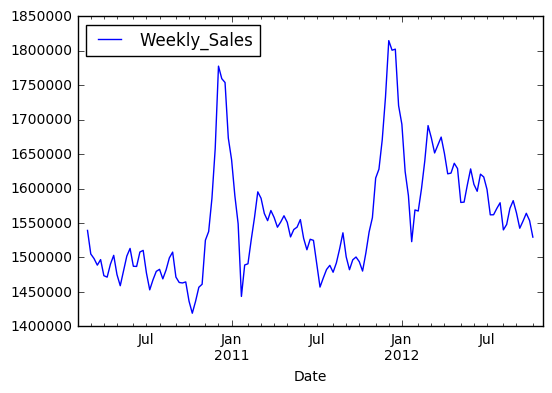

In [47]:
df1[['Weekly_Sales']].resample('W').mean().rolling(window=7, center=True).mean().plot()

In [25]:
#There are sales peaks during the holidays, as expected. The graph does look like it is non-stationary. 

#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [48]:
from pandas.tools.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_acf
df1.Weekly_Sales.autocorr(lag=1)

0.30215827941131262

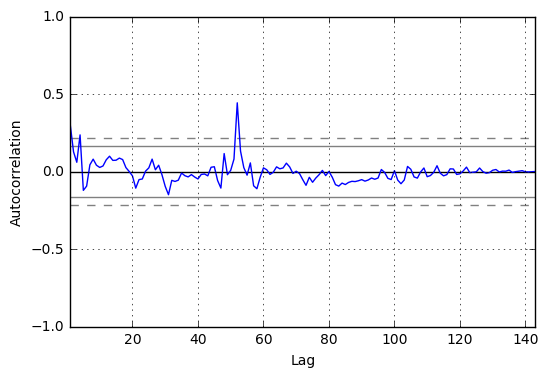

In [52]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(df1.Weekly_Sales)

In [49]:
df1.Weekly_Sales.autocorr(lag=2) 

0.12741313055390102

In [50]:
df1.Weekly_Sales.autocorr(lag=52) 

0.89537602947770101

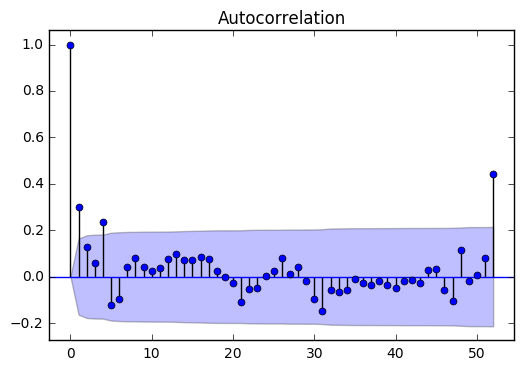

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df1.Weekly_Sales, lags=52)
plt.show()

#### Split the weekly sales data in a training and test set - using 75% of the data for training

In [54]:
df1.tail()

,Weekly_Sales
Date,
2012-09-30,1437059.26
2012-10-07,1670785.97
2012-10-14,1573072.81
2012-10-21,1508068.77
2012-10-28,1493659.74


In [66]:
train_d = df1.ix['2010-02-07':'2012-04-08']
test_d = df1.ix['2012-04-15':'2012-10-28']

In [65]:
#another way to do it
n = len(df1.Weekly_Sales)

train = df1.Weekly_Sales[:int(.75*n)]
test = df1.Weekly_sales[int(.75*n):]

AttributeError: 'DataFrame' object has no attribute 'Weekly_sales'

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [67]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [68]:
from statsmodels.tsa.arima_model import ARMA

model = sm.tsa.ARIMA(train, (1,0,0)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic=True,
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

//anaconda/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


NameError: name 'test' is not defined

#### Plot the residuals - where are their significant errors.

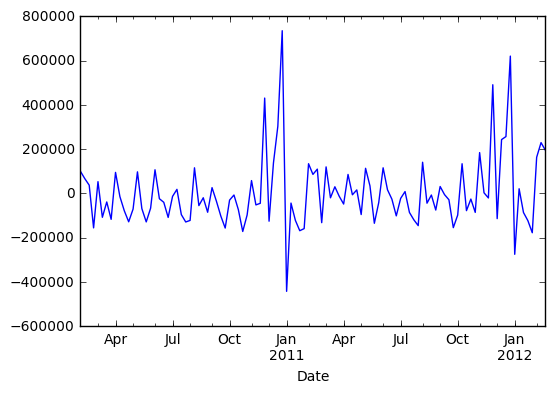

In [70]:
model.resid.plot()

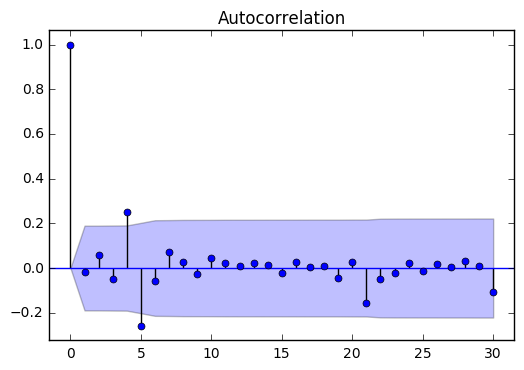

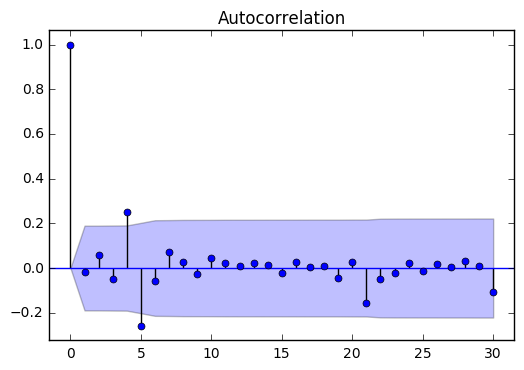

In [69]:
plot_acf(model.resid, lags=30)

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [71]:
model = sm.tsa.ARIMA(train, (2,0,0)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic=True,
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

NameError: name 'test' is not defined

In [ ]:
# TODO

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [ ]:
model = sm.tsa.ARIMA(train, (2,1,3)).fit()

predictions = model.predict(
    '2012-02-27',
    '')